# Ising 1D
Here, we generate data from an Ising 1D model and train a RBM on this data.

In [1]:
import sys
sys.path.append('../source/')
sys.path.append('../utilities/')
import numpy as np
import bm,rbm,utilities
from float_precision import curr_float,curr_int
import matplotlib.pyplot as plt
%matplotlib notebook

../source/numba_utilities.py:14: NumbaWarning: Cannot cache compiled function "dot_Potts_C" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @njit(signature, parallel=True, cache=True, nogil=False)
../source/numba_utilities.py:32: NumbaWarning: Cannot cache compiled function "dot_Potts2_C" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @njit(signature, parallel=True, cache=True, nogil=False)
../source/numba_utilities.py:50: NumbaWarning: Cannot cache compiled function "dot_Potts3_C" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @njit(signature, parallel=True, cache=True, nogil=False)
../source/numba_utilities.py:91: NumbaWarning: Cannot cache compiled function "compute_output_C" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @njit(signature, parallel=True, cache=True, nogil=False)
../source/numba_utilities.py:113: NumbaWarning: Cannot cache compiled function "c

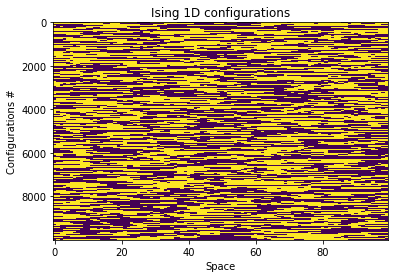

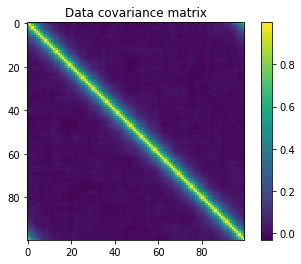

In [13]:
N = 100
beta = 1.0

BM = bm.BM(N=N,nature='Spin')
adjacency = np.eye(N,k=1) + np.eye(N,k=-1)
adjacency[0,-1] = 1. # Periodic boundary conditions.
adjacency[-1,0] = 1. # Periodic boundary conditions.
BM.layer.couplings = (beta * adjacency).astype(curr_float)
BM.layer.fields = np.zeros(N,dtype=curr_float)

configurations = BM.gen_data(Nthermalize=1000,Nstep=50,Nchains=10,Lchains=1000)
C = utilities.covariance(configurations,configurations)

fig,ax = plt.subplots()
plt.imshow(configurations,aspect='auto')
plt.xlabel('Space');
plt.ylabel('Configurations #');
plt.title('Ising 1D configurations')
plt.show()

fig,ax = plt.subplots()
plt.imshow(C);
plt.colorbar();
plt.title('Data covariance matrix');

Iteration number 0, pseudo-likelihood: -0.69
Starting epoch 1
[RBM] Iteration 1, time = 0.17s, pseudo-likelihood = -0.60
Starting epoch 2
[RBM] Iteration 2, time = 0.30s, pseudo-likelihood = -0.59
Starting epoch 3
[RBM] Iteration 3, time = 0.28s, pseudo-likelihood = -0.59
Starting epoch 4
[RBM] Iteration 4, time = 0.30s, pseudo-likelihood = -0.59
Starting epoch 5
[RBM] Iteration 5, time = 0.41s, pseudo-likelihood = -0.59
Starting epoch 6
[RBM] Iteration 6, time = 0.27s, pseudo-likelihood = -0.58
Starting epoch 7
[RBM] Iteration 7, time = 0.51s, pseudo-likelihood = -0.58
Starting epoch 8
[RBM] Iteration 8, time = 0.24s, pseudo-likelihood = -0.58
Starting epoch 9
[RBM] Iteration 9, time = 0.22s, pseudo-likelihood = -0.59
Starting epoch 10
[RBM] Iteration 10, time = 0.26s, pseudo-likelihood = -0.58
Starting epoch 11
[RBM] Iteration 11, time = 0.26s, pseudo-likelihood = -0.59
Starting epoch 12
[RBM] Iteration 12, time = 0.46s, pseudo-likelihood = -0.59
Starting epoch 13
[RBM] Iteration 13,

Text(0.5, 1.0, 'Hidden units receptive fields')

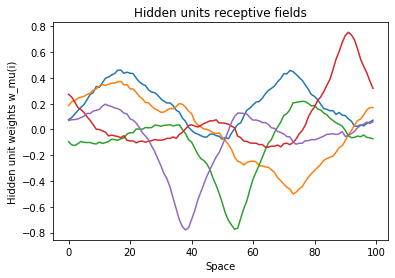

In [10]:
RBM = rbm.RBM(n_v=N, n_h = 5, visible='Spin',hidden='Spin',zero_field=True)
RBM.fit(configurations,n_iter=20)

plt.plot(RBM.weights.T);
plt.xlabel('Space')
plt.ylabel('Hidden unit weights w_mu(i)')
plt.title('Hidden units receptive fields')

We now repeat the same generation and training, with longer correlation length. The hidden unit receptive field get bigger and larger.

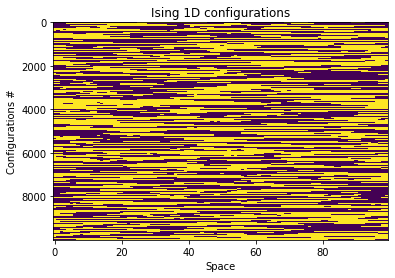

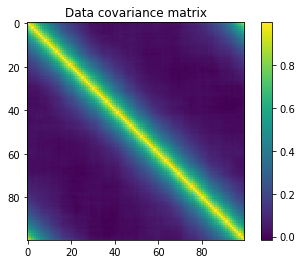

Iteration number 0, pseudo-likelihood: -0.69
Starting epoch 1
[RBM] Iteration 1, time = 0.49s, pseudo-likelihood = -0.50
Starting epoch 2
[RBM] Iteration 2, time = 0.47s, pseudo-likelihood = -0.46
Starting epoch 3
[RBM] Iteration 3, time = 0.36s, pseudo-likelihood = -0.45
Starting epoch 4
[RBM] Iteration 4, time = 0.38s, pseudo-likelihood = -0.44
Starting epoch 5
[RBM] Iteration 5, time = 0.23s, pseudo-likelihood = -0.44
Starting epoch 6
[RBM] Iteration 6, time = 0.22s, pseudo-likelihood = -0.44
Starting epoch 7
[RBM] Iteration 7, time = 0.52s, pseudo-likelihood = -0.43
Starting epoch 8
[RBM] Iteration 8, time = 0.35s, pseudo-likelihood = -0.43
Starting epoch 9
[RBM] Iteration 9, time = 0.37s, pseudo-likelihood = -0.43
Starting epoch 10
[RBM] Iteration 10, time = 0.45s, pseudo-likelihood = -0.43
Starting epoch 11
[RBM] Iteration 11, time = 0.20s, pseudo-likelihood = -0.43
Starting epoch 12
[RBM] Iteration 12, time = 0.20s, pseudo-likelihood = -0.42
Starting epoch 13
[RBM] Iteration 13,

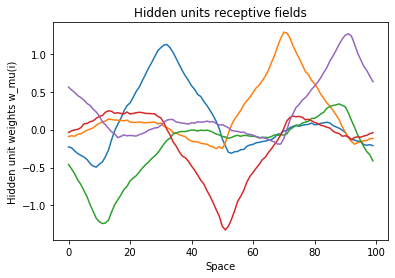

In [16]:
N = 100
beta = 1.5

BM = bm.BM(N=N,nature='Spin')
adjacency = np.eye(N,k=1) + np.eye(N,k=-1)
adjacency[0,-1] = 1. # Periodic boundary conditions.
adjacency[-1,0] = 1. # Periodic boundary conditions.
BM.layer.couplings = (beta * adjacency).astype(curr_float)
BM.layer.fields = np.zeros(N,dtype=curr_float)

configurations = BM.gen_data(Nthermalize=1000,Nstep=50,Nchains=10,Lchains=1000)
C = utilities.covariance(configurations,configurations)

fig,ax = plt.subplots()
plt.imshow(configurations,aspect='auto')
plt.xlabel('Space');
plt.ylabel('Configurations #');
plt.title('Ising 1D configurations')
plt.show()

fig,ax = plt.subplots()
plt.imshow(C);
plt.colorbar();
plt.title('Data covariance matrix');
plt.show()
RBM = rbm.RBM(n_v=N, n_h = 5, visible='Spin',hidden='Spin',zero_field=True)
RBM.fit(configurations,n_iter=20)

fig,ax = plt.subplots()
plt.plot(RBM.weights.T);
plt.xlabel('Space')
plt.ylabel('Hidden unit weights w_mu(i)')
plt.title('Hidden units receptive fields')
plt.show()